In [ ]:
#Program Name: percolation.ipynb
#Date Created: September 5th, 2022
#Author: Deepesh Verma (dbv293)
#Function: Implementation of the Game of Life percolation model. (BTK cellular automation)

In [7]:
import numpy as np 


In [12]:

class gol: #Game of Life
    """
    Simulation of the 2D Game of Life, which is based off of the BTK cellular automation model. 

    Parameters:
        n: size of square, n by n, lattice
        grid: initial lattice of blocked or open sites
        gridf: lattice after water is poured into the system
        p: probability of blockage when lattice site is randomly chosen

    """

    def __init__(self,n,p,random_state=None):
        """
        Initializes the grid of lattice sites randomly.
        """

        #Initializes the random seed.
        self.random_state = random_state

        #Sets up the grid by populating it with values.
        self.n = n
        self.p = p
        self.grid = np.zeros((n,n))
        self.init_grid()

        self.gridf = np.copy(self.grid)

    def init_grid(self):
        """
        Randomly assigns filled or open values to grid
        """

        #Establishes random seed.
        np.random.seed(self.random_state)
        
        #Populates grid with filled (0) or open (1) states.
        self.grid = np.random.choice(2,size=(self.n,self.n),p=(1-self.p,self.p))

        #Populates gridf with filled (0) or open (1) states.
        self.gridf = np.copy(self.grid)

    def rec_flow(self,x,y):
        """
        Recursive solution to the filling of the lattice.
        """

        #Do not change site if it is off the lattice. 
        if x < 0 or x >= self.n:
            return None
        if y <0 or y >= self.n:
            return None
        if self.grid[x,y] == 0: #Site is blocked so we cannot fill.
            return None
        if self.gridf[x,y] == 2: #Site is full so we cannot fill further.
            return None

        #Fills any other lattice sites not ruled out.
        self.gridf[x,y] = 2

        #Checks the nearest neighbors for water that flows. 
        self.rec_flow(x+1,y)
        self.rec_flow(x,y+1)
        self.rec_flow(x,y-1)
        self.rec_flow(x-1,y)

    def rec_percolation(self):
        """
        Percolates using recursion method.
        """
        #Runs percolation one column at a time.
        for i in range(self.n):
            self.rec_flow(0,i)

    def percolate(self):
        """
        Runs percolation simulation and returns results.
        """
        #Runs the percolation flow model. 
        self.rec_percolation()

        #Returns boolean if any lattice site is full.
        return np.any(self.gridf[-1]==2)

In [38]:
test = gol(n=10000, random_state=0, p=0.5)

In [15]:
#From HW page. 

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def plot_percolation(mat):
    """
    Plots a percolation matrix, where 0 indicates a blocked site, 1 indicates an empty 
    site, and 2 indicates a filled site
    """
    cvals  = [0, 1, 2]
    colors = [(0, 0, 0), (0.4, 0.4, 0.4), (0.372549, 0.596078, 1)]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plt.imshow(mat, cmap=cmap, vmin=0, vmax=2)

False
False
True


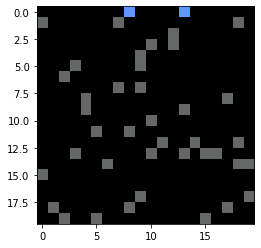

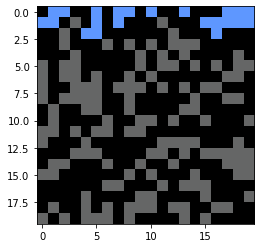

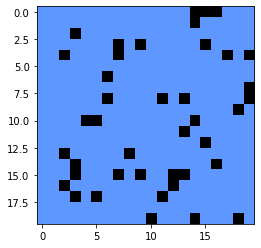

In [18]:
model = gol(n=20, random_state=0, p=0.1)
print(model.percolate())
plt.figure()
plot_percolation(model.gridf)

model = gol(n=20, random_state=0, p=0.4)
print(model.percolate())
plt.figure()
plot_percolation(model.gridf)

model = gol(n=20, random_state=0, p=0.9)
print(model.percolate())
plt.figure()
plot_percolation(model.gridf)

Running replicate simulations for p = 0.0
Running replicate simulations for p = 0.041666666666666664
Running replicate simulations for p = 0.08333333333333333
Running replicate simulations for p = 0.125
Running replicate simulations for p = 0.16666666666666666
Running replicate simulations for p = 0.20833333333333331
Running replicate simulations for p = 0.25
Running replicate simulations for p = 0.29166666666666663
Running replicate simulations for p = 0.3333333333333333
Running replicate simulations for p = 0.375
Running replicate simulations for p = 0.41666666666666663
Running replicate simulations for p = 0.4583333333333333
Running replicate simulations for p = 0.5
Running replicate simulations for p = 0.5416666666666666
Running replicate simulations for p = 0.5833333333333333
Running replicate simulations for p = 0.625
Running replicate simulations for p = 0.6666666666666666
Running replicate simulations for p = 0.7083333333333333
Running replicate simulations for p = 0.75
Running

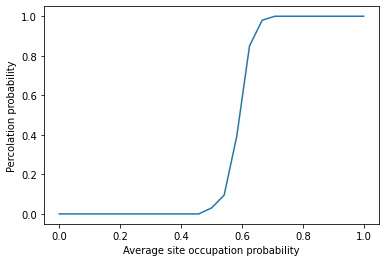

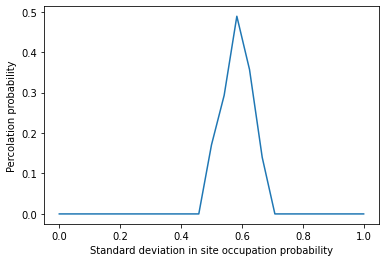

Finished simulation 0
Finished simulation 500
Finished simulation 1000
Finished simulation 1500
Finished simulation 2000
Finished simulation 2500
Finished simulation 3000
Finished simulation 3500
Finished simulation 4000
Finished simulation 4500


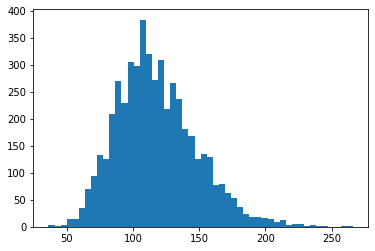

In [23]:
#From HW Page.
pvals = np.linspace(0, 1, 25) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
for p in pvals:
    print("Running replicate simulations for p = {}".format(p), flush=True)
    all_replicates = list()
    for i in range(n_reps):
        # Initialize the model
        model = gol(30, p=p)
        all_replicates.append(model.percolate())
    all_percolations.append(all_replicates)

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.xlabel('Standard deviation in site occupation probability')
plt.ylabel('Percolation probability')

plt.show()


## Just from curiousity, plot the distribution of cluster sizes at the percolation threshold
## why does it appear to be bimodal?
all_cluster_sizes = list()
p_c = 0.407259
n_reps = 5000
for i in range(n_reps):
    model = gol(100, p=p_c)
    model.percolate()
    cluster_size = np.sum(model.gridf == 2)
    all_cluster_sizes.append(cluster_size)

    if i % 500 == 0:
        print("Finished simulation {}".format(i), flush=True)

all_cluster_sizes = np.array(all_cluster_sizes)

plt.figure()
plt.hist(all_cluster_sizes, 50);